In [21]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as font_manager

In [4]:
latency = [0.2, 0.3, 0.4, 0.5]
accuracy = [0.89, 0.9, 0.8, 0.7]
energy = [0.9, 9, 10, 12]
time_step = [1, 2, 4, 8]

In [5]:
data = list(zip(time_step, accuracy, energy, latency))

In [6]:
df = pd.DataFrame(data, columns=['time_step','accuracy','energy','latency'])
df.set_index('time_step')

,accuracy,energy,latency
time_step,,,
1,0.89,0.9,0.2
2,0.90,9.0,0.3
4,0.80,10.0,0.4
8,0.70,12.0,0.5


In [50]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

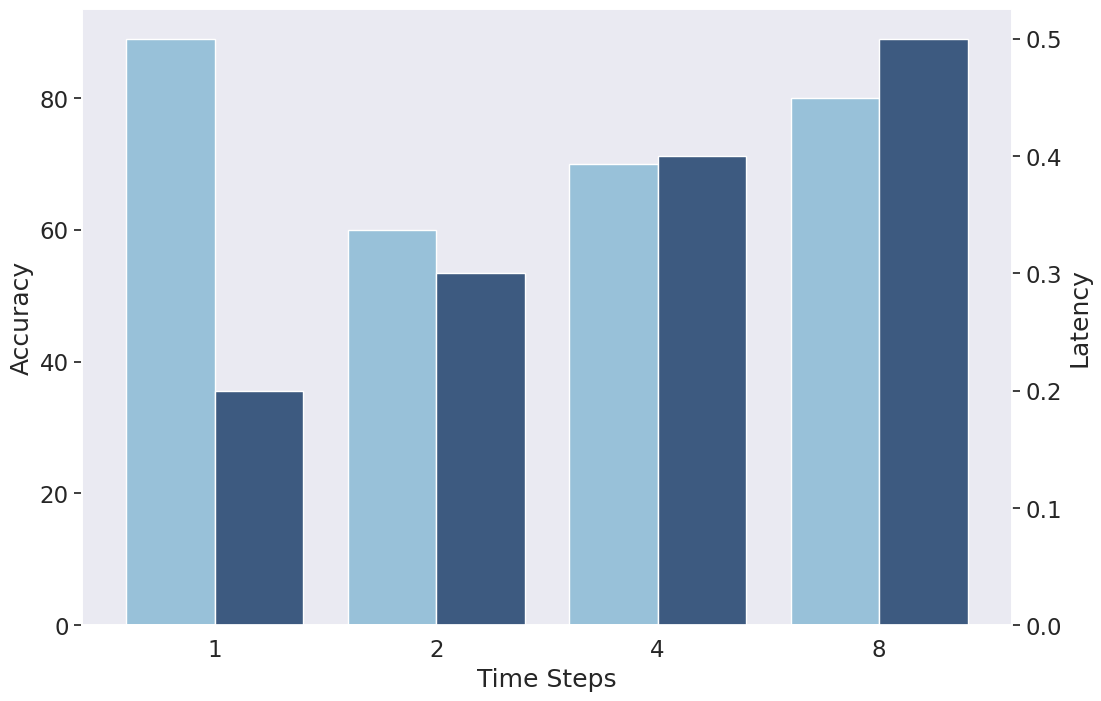

In [88]:
fig = plt.figure(figsize = (12,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.accuracy.plot(kind='bar',xlabel = 'Time Steps', rot=0, color='#98c1d9', ax=ax, width=width, position=1)
df.latency.plot(kind='bar', color='#3d5a80', ax=ax2, width=width, position=0)

ax.set_ylabel('Accuracy')
ax2.set_ylabel('Latency')

ax.grid(False)
ax2.grid(False)

plt.xticks(range(4), df.time_step, rotation='horizontal')

plt.xlim([-0.6, 3.6])

plt.show()

/tmp/ipykernel_3535125/1911992210.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels1, size=12, weight='bold')
/tmp/ipykernel_3535125/1911992210.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels1, size=12, weight='bold')
/tmp/ipykernel_3535125/1911992210.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(labels2, size=12, weight='bold')
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


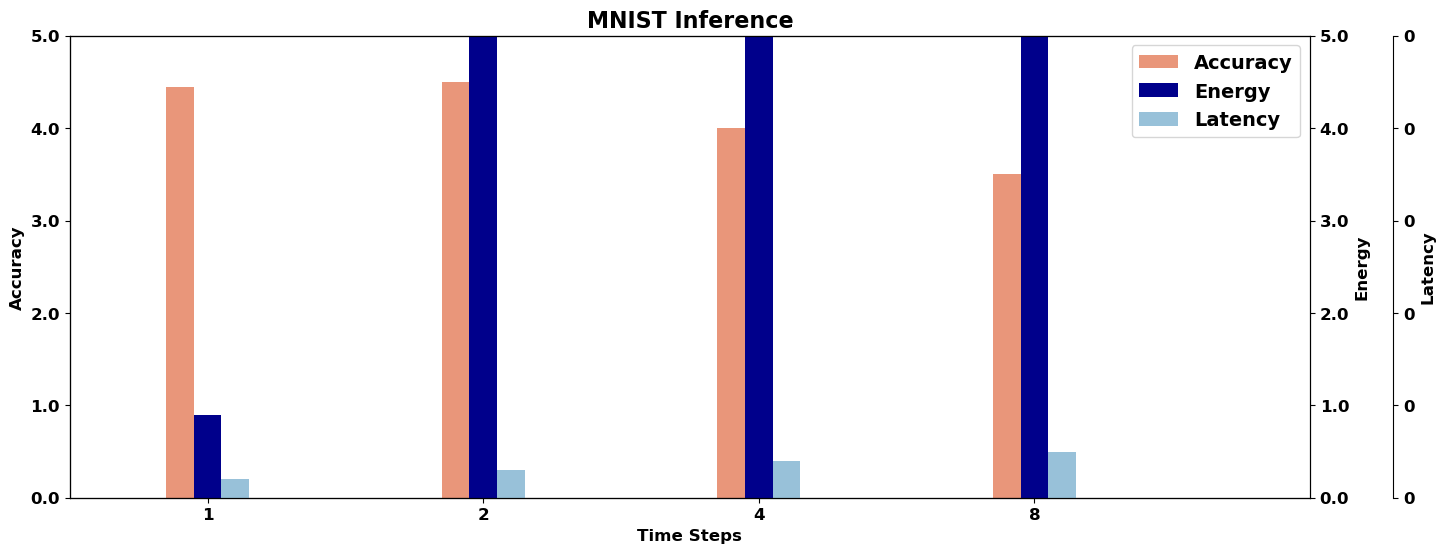

In [33]:

fig,ax = plt.subplots(figsize=(16,6))

labels = df['time_step'].tolist()

font = font_manager.FontProperties(family='Arial',
                                   weight='bold',
                                   style='normal', size=14)

x = np.arange(len(labels))

ax2 = ax.twinx()
ax3 = ax.twinx()

ax.set_xlim(-0.5, 4)
ax.set_ylim(0, 1)
ax2.set_ylim(0, 5)
ax3.set_ylim(0,1)

ax.set_xlabel('Time Steps', size=12, weight='bold')
ax.set_ylabel(r'Accuracy', size=12, weight='bold')
ax2.set_ylabel(r'Energy', size=12, weight='bold')
ax3.set_ylabel(r'Latency', size=12, weight='bold')

color=['firebrick','red','darksalmon','darkblue','#98c1d9','royalblue']
width = 0.1
p1 = ax.bar(x-width, df['accuracy'], width=width, color=color[2], align='center', label='Accuracy')
p2 = ax2.bar(x, df['energy'], width=width, color=color[3], align='center', label='Energy')
p3 = ax2.bar(x+(width*1), df['latency'], width=width, color=color[4], align='center', label='Latency')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax2.legend(h1+h2+h3, l1+l2+l3, loc=1, prop=font)


ax3.spines['right'].set_position(('outward', 60))  
ax3.xaxis.set_ticks([])

ax.set_xticks(x)
ax.set_xticklabels(labels, size=12, weight='bold')

labels1 = [round(el, 2) for el in ax2.get_yticks()]
labels2 = [int(el) for el in ax3.get_yticks()/1000]
ax.set_yticklabels(labels1, size=12, weight='bold')
ax2.set_yticklabels(labels1, size=12, weight='bold')
ax3.set_yticklabels(labels2, size=12, weight='bold')

ax.set_title("MNIST Inference", font= "Arial", fontsize=16, weight='bold')
ax3.set_ylabel('Latency',size=12, weight='bold')
fig.show()
